<a href="https://colab.research.google.com/github/KaranguptaX1/Colab/blob/main/K4Media_%26_Technologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yes, Artificial Intelligence can play games, including HTML5 games. AI playing games typically involves using machine learning, reinforcement learning, and computer vision techniques.
##Using Computer Vision to Enable AI to Play Games:

###1. Game Environment Perception:
Screenshot Capture: The AI captures frames (screenshots) of the game at regular intervals.
Image Processing: Computer vision techniques are used to process these frames and extract relevant information, such as the positions of objects, player character, enemies, scores, etc.

###2. State Representation:
Feature Extraction: Using computer vision algorithms (e.g., edge detection, object recognition), the AI identifies and extracts key features from the game frames.
State Representation: The extracted features are used to represent the current state of the game, which the AI will use to make decisions.

###3. Decision Making:
Reinforcement Learning (RL): Techniques like Q-learning or Deep Q-Networks (DQNs) are employed. The AI learns optimal strategies by receiving rewards or penalties based on its actions and the resulting state.
Neural Networks: Deep learning models can predict the best action to take in a given state, improving the AI's gameplay over time.

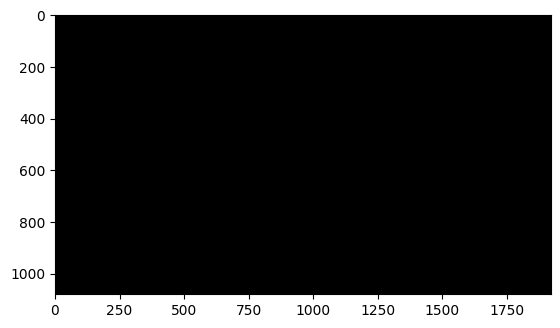

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.919    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4154     |
|    time_elapsed     | 0        |
|    total_timesteps  | 85       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.9     |
|    ep_rew_mean      | 18.9     |
|    exploration_rate | 0.857    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 649      |
|    time_elapsed     | 0        |
|    total_timesteps  | 151      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.551    |
|    n_updates        | 12       |
-------------------------------

In [2]:
!apt-get install -y xvfb
!pip install pyvirtualdisplay mss numpy opencv-python gymnasium stable-baselines3
from pyvirtualdisplay import Display
import mss
import numpy as np
import cv2
import gymnasium as gym
from stable_baselines3 import DQN
display = Display(visible=0, size=(1920, 1080))
display.start()

with mss.mss() as sct:
    monitor = sct.monitors[0]
    screenshot = sct.grab(monitor)
    img = np.array(screenshot)

display.stop()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

from matplotlib import pyplot as plt
plt.imshow(edges, cmap='gray')
plt.show()

env = gym.make('CartPole-v1')
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

###Yes, AI animation is possible and can be used to create compelling video content, like the example you gave. There are many different AI/ML tools and techniques that can be used to create images and videos. Here is a list of tools and techniques you can use to create AI animations.
##TensorFlow/PyTorch:
These are the main frameworks for creating and training deep learning models. They provide an extensive library and tools for creating custom images.
Keras: An easy-to-use API for building neural networks, integrated with TensorFlow.

##OpenCV:
Used for image processing tasks, including video manipulation and frame extraction.
##Dlib:
For facial symbol recognition and other computer vision tasks.
##Blender:
An open source 3D rendering suite that can be written in Python. It is commonly used for 3D modeling, animation and rendering.
##Unity3D:
A popular game engine that supports 2D and 3D animation and can be extended with machine learning plugins.
##Google Text-to-Speech API:
Converts text to natural-looking speech.
##Amazon Polly:
A new TTS service that can generate life-like speech.

In [ ]:
!pip install tensorflow keras torch torchvision opencv-python dlib stylegan2_pytorch
import torch
from stylegan2_pytorch import Model

model = Model(name='stylegan2')
model.train(data='/path/to/face/images', num_train_steps=10000)
from stylegan2_pytorch import Model

model = Model.load('path/to/pretrained/model.pt')

image = model.generate_images(num_images=1)

import cv2
import numpy as np

height, width = 512, 512
blank_image = np.zeros((height, width, 3), np.uint8)

for i in range(0, width, 5):
    img = blank_image.copy()
    cv2.circle(img, (i, height//2), 50, (255, 0, 0), -1)
    cv2.imshow('Animation', img)
    cv2.waitKey(50)
cv2.destroyAllWindows()

import bpy
bpy.ops.mesh.primitive_cube_add(size=2)
bpy.context.object.location = (0, 0, 0)
bpy.context.object.keyframe_insert(data_path="location", frame=1)
bpy.context.object.location = (5, 0, 0)
bpy.context.object.keyframe_insert(data_path="location", frame=100)

bpy.ops.render.render(animation=True)

from google.cloud import texttospeech
client = texttospeech.TextToSpeechClient()
synthesis_input = texttospeech.SynthesisInput(text="Hello, world!")

voice = texttospeech.VoiceSelectionParams(
    language_code="en-US",
    ssml_gender=texttospeech.SsmlVoiceGender.NEUTRAL,
)

audio_config = texttospeech.AudioConfig(
    audio_encoding=texttospeech.AudioEncoding.MP3,
)

response = client.synthesize_speech(
    input=synthesis_input, voice=voice, audio_config=audio_config
)

with open("output.mp3", "wb") as out:
    out.write(response.audio_content)
